# Question 2

In this question we want to see if there is any connection between the movie's language to it's success.

Using KNN model.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creating data frame and getting info about the data

In [2]:
file_path = './movie_dataset.csv'
movies = pd.read_csv(file_path)

Here we can see that the total number of movies is 4803

And the total number of movies with NaN values in the column 'original_language' is 0

In [3]:
print(movies['original_language'].count())
print(movies['original_language'].isna().sum())

4803
0


***The total number of movies in each language***

In [4]:
movies['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

The number of movies in English is 4505

And there are many single movies in foreign language

In [5]:
eng_movies = movies.loc[movies['original_language'] == 'en']
eng_movies['original_language'].count()

4505

The total number of movies (in English) with rating above 7 is 867

In [6]:
temp2 = eng_movies.loc[eng_movies['vote_average'] >= 7]
temp2['vote_average'].count()

867

***Getting all the movies with 'original_language' that different from English***

The number of movies is 298

In [7]:
noneng_movies = movies.loc[movies['original_language'] != 'en']
noneng_movies['original_language'].count()

298

Total number of foreign movies with rate above 7 is: 121

In [8]:
temp4 = noneng_movies.loc[noneng_movies['vote_average'] >= 7]
temp4['vote_average'].count()

121

Changing foreign movies with less than 10 movies to 'other'

The reason is because that there are many languages with only 1 single movie.

In [9]:
non_eng_movies_counter = noneng_movies['original_language'].value_counts()
lang_below_10 = non_eng_movies_counter[non_eng_movies_counter < 10].index.tolist()

noneng_movies.loc[noneng_movies['original_language'].isin(lang_below_10), 'original_language'] = 'other'

The data is "Imbalanced", that means there are too many movies in English and less movies in different language.

That means if we try to classify according to this data we are more likely get wrong estimation, because most of the movies are in English.

There are many ways to solve this problem, we will use Undersampling and Group.

reference: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/


# Undersampling

In this section we will use the Undersampling technique to try and fix this issue, we will sample 298 movies in english at random.

In [10]:
eng_movies = eng_movies.sample(n=298)

Now we need to combine the dataframes

reference: https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

The total number of movies is 596

In [11]:
final_frame = pd.concat([eng_movies, noneng_movies]) 
final_frame['index'].count()

596

reference: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

https://seaborn.pydata.org/generated/seaborn.barplot.html

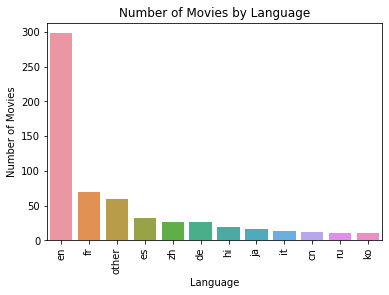

In [12]:
language_counts = final_frame['original_language'].value_counts()

# create a DataFrame from the language counts
language_df = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# Plotting the data
sns.barplot(x='Language', y='Count', data=language_df)
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Language')
plt.xticks(rotation=90)

plt.show()

In [13]:
final_frame = final_frame.reset_index()
final_frame = final_frame.drop('index', axis = 1)

one_hot_encoded = pd.get_dummies(final_frame['original_language'])
one_hot_encoded

,cn,de,en,es,fr,hi,it,ja,ko,other,ru,zh
0,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
591,False,False,False,False,True,False,False,False,False,False,False,False
592,False,False,False,False,False,False,False,False,False,True,False,False
593,False,False,False,False,False,False,False,False,False,True,False,False
594,False,False,False,False,False,False,False,True,False,False,False,False


In [14]:
"""
file_path2 = './movies_metadata.csv'
movies2 = pd.read_csv(file_path2,dtype='unicode')

language_counts = movies2['original_language'].value_counts()
language_counts_below_10 = language_counts[language_counts < 10].index

movies2.loc[movies2['original_language'].isin(language_counts_below_10), 'original_language'] = 'other'

movies2['original_language'].value_counts()
"""

"\nfile_path2 = './movies_metadata.csv'\nmovies2 = pd.read_csv(file_path2,dtype='unicode')\n\nlanguage_counts = movies2['original_language'].value_counts()\nlanguage_counts_below_10 = language_counts[language_counts < 10].index\n\nmovies2.loc[movies2['original_language'].isin(language_counts_below_10), 'original_language'] = 'other'\n\nmovies2['original_language'].value_counts()\n"

In [15]:
# Creating the labels values
vote_avg = final_frame['vote_average']

vote_avg
y = []
for i in range(len(vote_avg)):
    if vote_avg[i] >= 7:
        y.append(1)
    else:
        y.append(-1)

In [16]:
# X = one_hot_encoded
# X = pd.concat([final_frame[['budget']], one_hot_encoded], axis=1)
# X = pd.concat([final_frame[['vote_average']], one_hot_encoded], axis=1)
X = pd.concat([final_frame[['budget', 'runtime']], one_hot_encoded], axis=1)
X = X.fillna(90)

# splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# using KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# measure the model performence
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6833333333333333
Precision: 0.5483870967741935
Recall: 0.4146341463414634
F1-score: 0.4722222222222222


# combining all Non-English movies into one group

Another approach is to combine all the non-English movies into one group called "other".

It's less accurate, for example there is no difference between movie in Spain to movie in Israel.


In [17]:
file_path = './movie_dataset.csv'
movies = pd.read_csv(file_path)

# getting all the non eng movies
non_english_movies = movies['original_language'] != 'en'

# set their language to other
movies.loc[non_english_movies, 'original_language'] = 'other'

movies['original_language'].value_counts()

original_language
en       4505
other     298
Name: count, dtype: int64

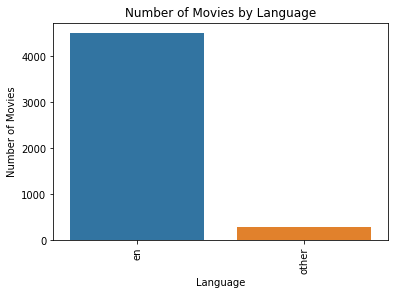

In [18]:
language_counts = movies['original_language'].value_counts()

# Create a DataFrame from the language counts
language_df = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# plotting the data
sns.barplot(x='Language', y='Count', data=language_df)
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Language')
plt.xticks(rotation=90)

plt.show()

Creating seperated dataframes for English and Non-English movies, and then using Undersampling and then combining the results into one dataframe.

In [36]:
eng_movies = movies.loc[(movies['original_language'] == 'en') & (movies['budget'] > 0)]
non_eng_movies = movies.loc[(movies['original_language'] == 'other') & (movies['budget'] > 0)]

# eng_movies = eng_movies.sample(n=non_eng_movies.shape[0])      # Remove the '#' to run this with undersampling

# Combining the dataframes
final_frame = pd.concat([eng_movies, non_eng_movies]) 
movies_features = ['original_language', 'vote_average','budget']
X = final_frame[movies_features]
X = X.reset_index()
X = X.drop('index', axis = 1)
X

,original_language,vote_average,budget
0,en,7.2,237000000
1,en,6.9,300000000
2,en,6.3,245000000
3,en,7.6,250000000
4,en,6.1,260000000
...,...,...,...
3761,other,7.6,200000
3762,other,7.8,180000
3763,other,7.1,120000
3764,other,7.4,20000


In [37]:
vote_avg = X['vote_average']

y = []
for i in range(len(vote_avg)):
    if vote_avg[i] >= 7:
        y.append(1)
    else:
        y.append(-1)
X.count()

original_language    3766
vote_average         3766
budget               3766
dtype: int64

Now we need to use one-hot-encoding to make the 'original_language' feature into vectors

reference: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [38]:
# performing one-hot-encoding
one_hot_encoded = pd.get_dummies(X['original_language'], prefix='lang')
one_hot_encoded

,lang_en,lang_other
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
3761,False,True
3762,False,True
3763,False,True
3764,False,True


In [39]:
X_new = pd.concat([X[['budget']], one_hot_encoded], axis=1)
# X_new = pd.concat([X[['vote_average']], one_hot_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# measureing the data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7572944297082228
Precision: 0.3373493975903614
Recall: 0.1794871794871795
F1-score: 0.23430962343096234


In [40]:
for X,Y in zip(knn.predict(X_test_scaled),y_test):
    print("Model Score:", X, "Actual score:", Y) 

Model Score: -1 Actual score: 1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: 1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: 1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: 1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actu

If we use the vote_avreage the model is too accurate, we guess that the good results are coming from the 'vote_average' feature.

If the model know the vote_average of the movie then it succefully know how to seperate from movie that succedded to a movie that didn't succedded.

So we are going to try differenet features.

***Using the revenue feature***

In [34]:
file_path = './movie_dataset.csv'
movies = pd.read_csv(file_path)

# seperating the English and Non-English movies
non_english_movies = movies['original_language'] != 'en'
movies.loc[non_english_movies, 'original_language'] = 'other'
eng_movies = movies.loc[movies['original_language'] == 'en']
non_eng_movies = movies.loc[movies['original_language'] == 'other']

# sampling 298 english movies
eng_movies = eng_movies.sample(n=298)

final_frame = pd.concat([eng_movies, non_eng_movies]) 
movies_features = ['original_language', 'vote_average', 'revenue']
X = final_frame[movies_features]
X = X.reset_index()
X = X.drop('index', axis=1)

# we keep calculating the label using the vote_average, but we will drop this feature
vote_avg = X['vote_average']
y = []
for i in range(len(vote_avg)):
    if vote_avg[i] >= 7:
        y.append(1)
    else:
        y.append(-1)

X = X.drop('vote_average', axis=1)

# performing one-hot-encoding
one_hot_encoded = pd.get_dummies(X['original_language'], prefix='lang')
one_hot_encoded
X_new = pd.concat([X[['revenue']], one_hot_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6666666666666666
Precision: 0.4166666666666667
Recall: 0.2777777777777778
F1-score: 0.33333333333333337


In [35]:
for X,Y in zip(knn.predict(X_test_scaled),y_test):
    print("Model Score:", X, "Actual score:", Y) 

Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: 1 Actual score: -1
Model Score: 1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: 1 Actual score: -1
Model Score: 1 Actual score: 1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: -1 Actual score: -1
Model Score: 1 Actual score: 1
Model Score: -1 Actual score: 1
Model Score: -1 Actual sc

Let's try another combination.

***revenue+runtime***

In [36]:
file_path = './movie_dataset.csv'
movies = pd.read_csv(file_path)

# seperating the English and Non-English movies
non_english_movies = movies['original_language'] != 'en'
movies.loc[non_english_movies, 'original_language'] = 'other'
eng_movies = movies.loc[movies['original_language'] == 'en']
non_eng_movies = movies.loc[movies['original_language'] == 'other']

eng_movies = eng_movies.sample(n=298)

final_frame = pd.concat([eng_movies, non_eng_movies]) 
movies_features = ['original_language', 'vote_average', 'revenue', 'runtime']
X = final_frame[movies_features]
X = X.fillna(90)
X = X.reset_index()
X = X.drop('index', axis=1)

# we keep calculating the label using the vote_average, but we will drop this feature
vote_avg = X['vote_average']
y = []
for i in range(len(vote_avg)):
    if vote_avg[i] >= 7:
        y.append(1)
    else:
        y.append(-1)

X = X.drop('vote_average', axis=1)

one_hot_encoded = pd.get_dummies(X['original_language'], prefix='lang')
one_hot_encoded
X_new = pd.concat([X[['revenue', 'runtime']], one_hot_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6833333333333333
Precision: 0.45
Recall: 0.25
F1-score: 0.32142857142857145


We can see a little bit of improvment in the F1 score.